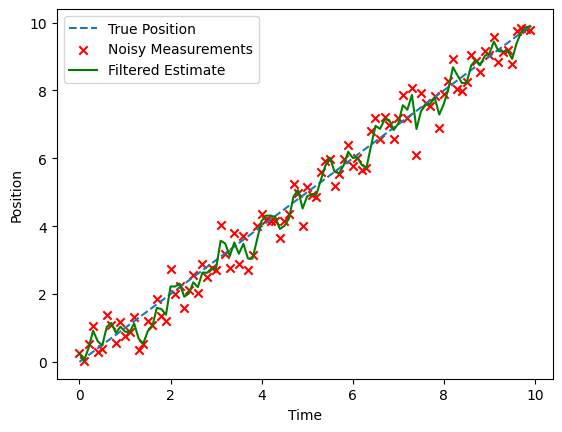

In [33]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# Define the true motion parameters
initial_position = 0
velocity = 1
process_noise = 0.1

# Simulate noisy measurements
np.random.seed(42)
true_position = initial_position + velocity * np.arange(0, 10, 0.1)
noisy_measurements = true_position + np.random.normal(0, 0.5, size=len(true_position))

# Initialize Kalman filter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.F = np.array([[1, 1],
                 [0, 1]])  # State transition matrix
kf.H = np.array([[1, 0]])  # Measurement matrix
kf.P *= 1e3  # Covariance matrix
kf.R = 0.5  # Measurement noise
kf.Q = np.array([[0.1, 0.1],
                 [0.1, 0.1]])  # Process noise

# Initialize state
kf.x = np.array([0, 0])

# Kalman filter update
filtered_state_means_kf = []
for measurement in noisy_measurements:
    kf.predict()
    kf.update(measurement)
    filtered_state_means_kf.append(kf.x[0])

# Plot the true position, noisy measurements, and filtered estimates
plt.plot(np.arange(0, 10, 0.1) * velocity, true_position, label='True Position', linestyle='dashed')
plt.scatter(np.arange(0, 10, 0.1) * velocity, noisy_measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(np.arange(0, 10, 0.1) * velocity, filtered_state_means_kf, label='Filtered Estimate', color='green')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

In [17]:
measurement

0.24835707650561634

In [23]:
import numpy as np

from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt

def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    F = np.array([[1, dt, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, dt],
                  [0, 0, 0, 1]], dtype=float)
    return np.dot(F, x)
def hx(x):
   # measurement function - convert state into a measurement
   # where measurements are [x_pos, y_pos]
   return np.array([x[0], x[2]])
dt = 0.1
# create sigma points to use in the filter. This is standard for Gaussian processes
points = MerweScaledSigmaPoints(4, alpha=.1, beta=2., kappa=-1)
kf = UnscentedKalmanFilter(dim_x=4, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
kf.x = np.array([-1., 1., -1., 1]) # initial state
kf.P *= 0.2 # initial uncertainty
z_std = 0.1
kf.R = np.diag([z_std**2, z_std**2]) # 1 standard
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01**2, block_size=2)
zs = [[i+np.random.randn()*z_std, i+np.random.randn()*z_std] for i in range(50)] # measurements
for z in zs:
    kf.predict()
    kf.update(z)
    print(kf.x, 'log-likelihood', kf.log_likelihood)


[-0.17731363  1.07155311 -0.08253319  1.08093731] log-likelihood -3.3794422049843984
[0.48832031 2.06240755 0.50765773 1.93627556] log-likelihood -41.1602769845642
[1.30838017 3.91268529 1.33881783 3.85803438] log-likelihood -88.40049220742652
[2.4057977  6.12387081 2.33775335 5.77795325] log-likelihood -100.09281432508156
[3.48644891 7.44793722 3.41608312 7.1932674 ] log-likelihood -56.07038828483791
[4.48625995 8.07929739 4.51644095 8.13660667] log-likelihood -27.825681701473663
[5.58833691 8.71719952 5.70870757 8.95767015] log-likelihood -37.26079102306972
[6.65974552 9.09987859 6.76772088 9.27051187] log-likelihood -11.659866796322214
[7.72141022 9.35938757 7.76171249 9.38504248] log-likelihood -4.686309240304401
[8.80804597 9.59183214 8.82388433 9.57579519] log-likelihood -9.341114369361485
[9.86294165 9.72608988 9.82062281 9.63072423] log-likelihood -1.5342643535719964
[10.92285818  9.8383125  10.8055042   9.65875685] log-likelihood -1.089723740718032
[11.94748226  9.8866791  11.

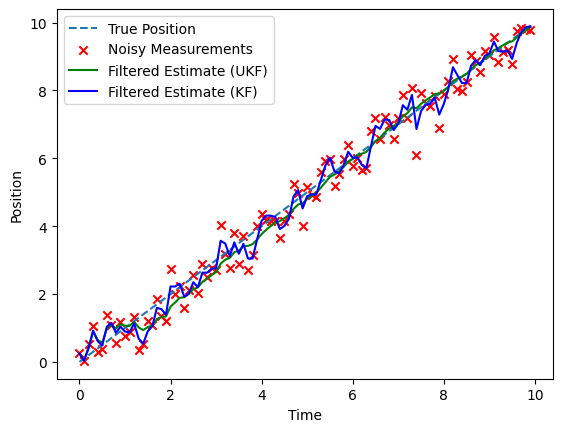

In [34]:
import numpy as np
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt

# Define the true motion parameters
initial_position = 0
velocity = 1
process_noise = 0.1

# Simulate noisy measurements
np.random.seed(42)
true_position = initial_position + velocity * np.arange(0, 10, 0.1)
noisy_measurements = true_position + np.random.normal(0, 0.5, size=len(true_position))

# Define the state transition function and measurement function
def fx(x, dt):
    # State transition function
    return np.array([x[0] + x[1] * dt, x[1]])

def hx(x):
    # Measurement function
    return np.array([x[0]])

# Specify sigma points using MerweScaledSigmaPoints
points = MerweScaledSigmaPoints(n=2, alpha=1e-3, beta=2, kappa=0)

# Initialize Unscented Kalman Filter
ukf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=0.1, fx=fx, hx=hx, points=points)
ukf.x = np.array([0, 1])  # Initial state
ukf.P *= 1e3  # Covariance matrix
ukf.R = 0.5  # Measurement noise
ukf.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=process_noise)  # Process noise

# Unscented Kalman filter update
filtered_state_means = []
for measurement in noisy_measurements:
    ukf.predict()
    ukf.update(np.array([measurement]))  # Ensure the measurement is a 1D array
    filtered_state_means.append(ukf.x[0])

# Plot the true position, noisy measurements, and filtered estimates
plt.plot(np.arange(0, 10, 0.1), true_position, label='True Position', linestyle='dashed')
plt.scatter(np.arange(0, 10, 0.1), noisy_measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(np.arange(0, 10, 0.1), filtered_state_means, label='Filtered Estimate (UKF)', color='green')
plt.plot(np.arange(0, 10, 0.1) * velocity, filtered_state_means_kf, label='Filtered Estimate (KF)', color='blue')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


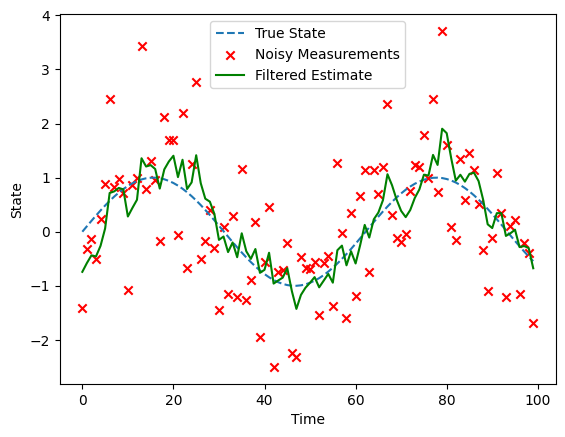

In [35]:
def ho_kalman_filter(z, Q, R, P0, A, H, B=None, u=None):
    """
    Ho-Kalman filter implementation.

    Parameters:
    - z: Measurement vector
    - Q: Process noise covariance matrix
    - R: Measurement noise covariance matrix
    - P0: Initial state covariance matrix
    - A: State transition matrix
    - H: Measurement matrix
    - B: Control input matrix (optional)
    - u: Control input vector (optional)

    Returns:
    - filtered_states: List of filtered state estimates
    """

    n = len(A)
    m = len(H[0])

    # Initialize variables
    x_hat = np.zeros((n, 1))  # Initial state estimate
    P = P0

    filtered_states = []

    for measurement in z:
        # Prediction step
        x_hat_minus = A @ x_hat
        P_minus = A @ P @ A.T + Q

        # Update step
        K = P_minus @ H.T @ np.linalg.inv(H @ P_minus @ H.T + R)
        x_hat = x_hat_minus + K @ (measurement - H @ x_hat_minus)
        P = (np.eye(n) - K @ H) @ P_minus

        filtered_states.append(x_hat.flatten())

    return np.array(filtered_states)

# Example usage:
# Define system matrices
A = np.array([[1]])
H = np.array([[1]])

# Measurement noise covariance
R = np.array([[1]])

# Process noise covariance
Q = np.array([[0.1]])

# Initial state covariance
P0 = np.array([[1]])

# Simulate a true state and noisy measurements
true_state = np.sin(np.linspace(0, 10, 100))
measurements = true_state + np.random.normal(0, np.sqrt(R[0, 0]), size=len(true_state))

# Apply the Ho-Kalman filter
filtered_states = ho_kalman_filter(measurements, Q, R, P0, A, H)

# Plot the true state, measurements, and filtered estimates
plt.plot(true_state, label='True State', linestyle='dashed')
plt.scatter(range(len(measurements)), measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(filtered_states, label='Filtered Estimate', color='green')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()

In [102]:
import numpy as np
from scipy.linalg import eig
import cmath

def ho_kalman_era(data, dof, dt):
    """
    Perform Ho-Kalman/ERA to identify modal parameters.

    Parameters:
    - data: Dynamic strain data matrix (rows are time, columns are sensor locations)
    - dof: Number of degrees of freedom (number of modes to be identified)
    - dt: Time step between measurements

    Returns:
    - frequencies: Modal frequencies
    - damping_ratios: Damping ratios
    - mode_shapes: Mode shapes
    """

    # Step 1: Generate the Hankel matrix
    L = len(data)
    m = len(data[0])
    p = L - 1

    Hankel = np.zeros((p, p))
    

    for i in range(p):
        Hankel[:, i] = np.concatenate([data[i+1:i+p+1, 0], np.zeros(i)])

    size = int(np.floor(p/2))-1
    # H(0)
    Hankel_0 = Hankel[:size, :size]
    # H(1)
    Hankel_1 = Hankel[1:size+1, 1:size+1]

    # Step 2: Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(Hankel_0)

    # Step 3: State sequence matrix
    A = np.dot(np.linalg.pinv(np.sqrt(np.diag(S))) * U.T, Hankel_1) @ Vt.T @ np.linalg.pinv(np.sqrt(np.diag(S)))
    # Step 4: Eigendecomposition
    eigenvalues, eigenvectors = eig(A)

    # Step 5: Extract modal parameters
    eigenvalues = np.log(eigenvalues) / dt
    frequencies = np.abs(eigenvalues)
    # print(np.abs(eigenvalues))
    damping_ratios = np.real(eigenvalues) / np.abs(eigenvalues)
    mode_shapes = eigenvectors[:m, :dof]

    return frequencies, damping_ratios, mode_shapes



# Example data 
strain_data = np.random.rand(100, 4)  # 100 time steps, 4 sensor locations
num_dof = 3  # Number of degrees of freedom to identify

# Call the Ho-Kalman/ERA function
identified_frequencies, identified_damping_ratios, identified_mode_shapes = ho_kalman_era(strain_data, num_dof, dt=1.0)

# Print the results
print("Identified Modal Frequencies:", identified_frequencies)
print("Identified Damping Ratios:", identified_damping_ratios)
print("Identified Mode Shapes:", identified_mode_shapes)


Identified Modal Frequencies: [2.38535554 2.38535554 3.5117358  3.5117358  1.84396947 1.84396947
 2.6574501  2.6574501  3.12970956 3.12970956 2.44725491 2.44725491
 2.83948099 2.83948099 2.28931318 2.28931318 1.85502646 1.96052702
 1.96052702 3.83128302 3.17536185 3.17536185 3.79690221 3.79690221
 2.37562904 2.37562904 2.317574   2.317574   3.03378182 3.03378182
 2.66724135 2.66724135 2.84826009 2.84826009 2.24121402 2.24121402
 2.33475564 2.64220781 2.64220781 2.62560235 4.13984589 3.24337739
 3.24337739 3.35943661 3.35943661 4.86835876 4.29761173 4.29761173]
Identified Damping Ratios: [-0.34746238 -0.34746238 -0.53799592 -0.53799592 -0.95056884 -0.95056884
 -0.70165289 -0.70165289 -0.642539   -0.642539   -0.78381496 -0.78381496
 -0.71385014 -0.71385014 -0.85024102 -0.85024102 -1.         -0.98109462
 -0.98109462 -0.57238574 -0.7071897  -0.7071897  -0.61868307 -0.61868307
 -0.8945824  -0.8945824  -0.92809699 -0.92809699 -0.79342981 -0.79342981
 -0.89073707 -0.89073707 -0.85840738 -0.8